In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Ridge , Lasso
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
file_path = r"C:\Users\NIMMAGADDA SUNIL\Desktop\TechnoHacks\kc_house_data.csv"  # Use raw string literal
df = pd.read_csv(file_path, parse_dates=['date'])

In [4]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
df.shape

(21613, 21)

In [7]:
df.drop("id",axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [9]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


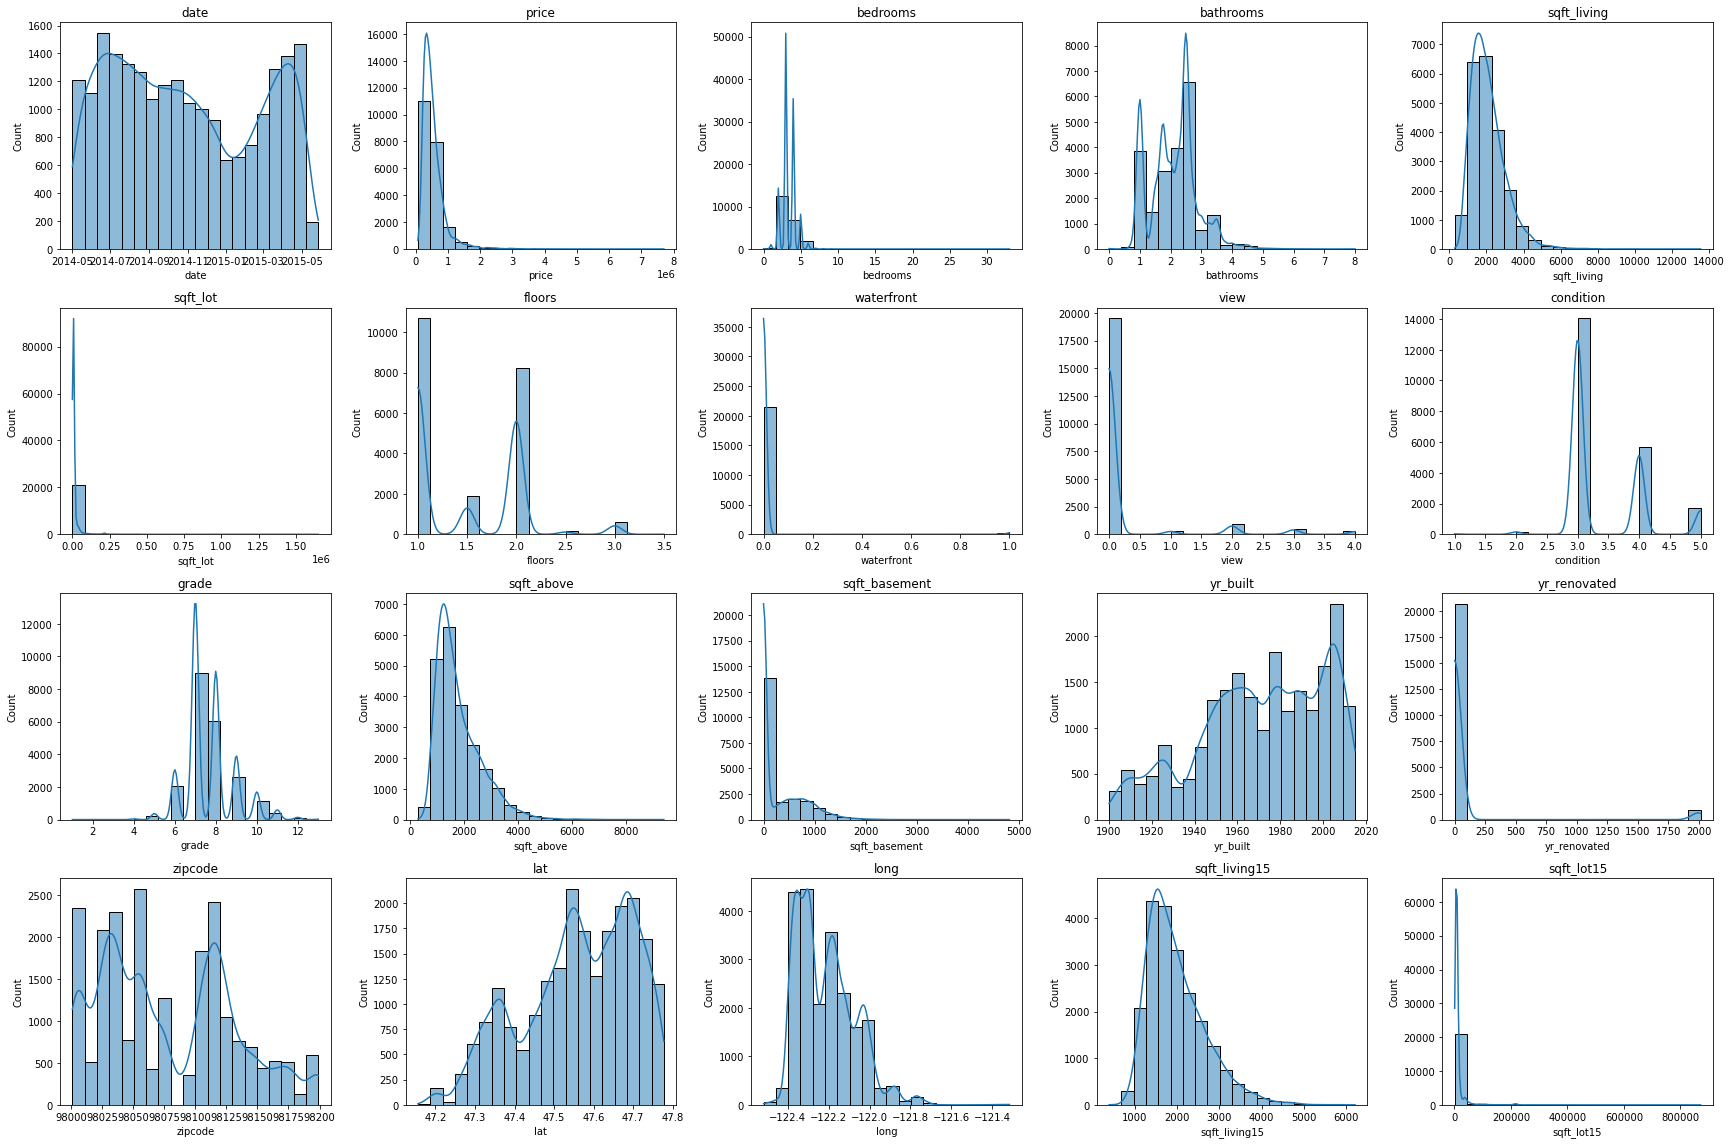

In [12]:
plt.figure(figsize=(24, 16))
for feature in df.columns.to_list():
    plt.subplot(4, 5, df.columns.to_list().index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [13]:
df["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [14]:
df["view"].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [15]:
df["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
df.drop(["waterfront","view","yr_renovated"],axis =1 ,inplace = True)

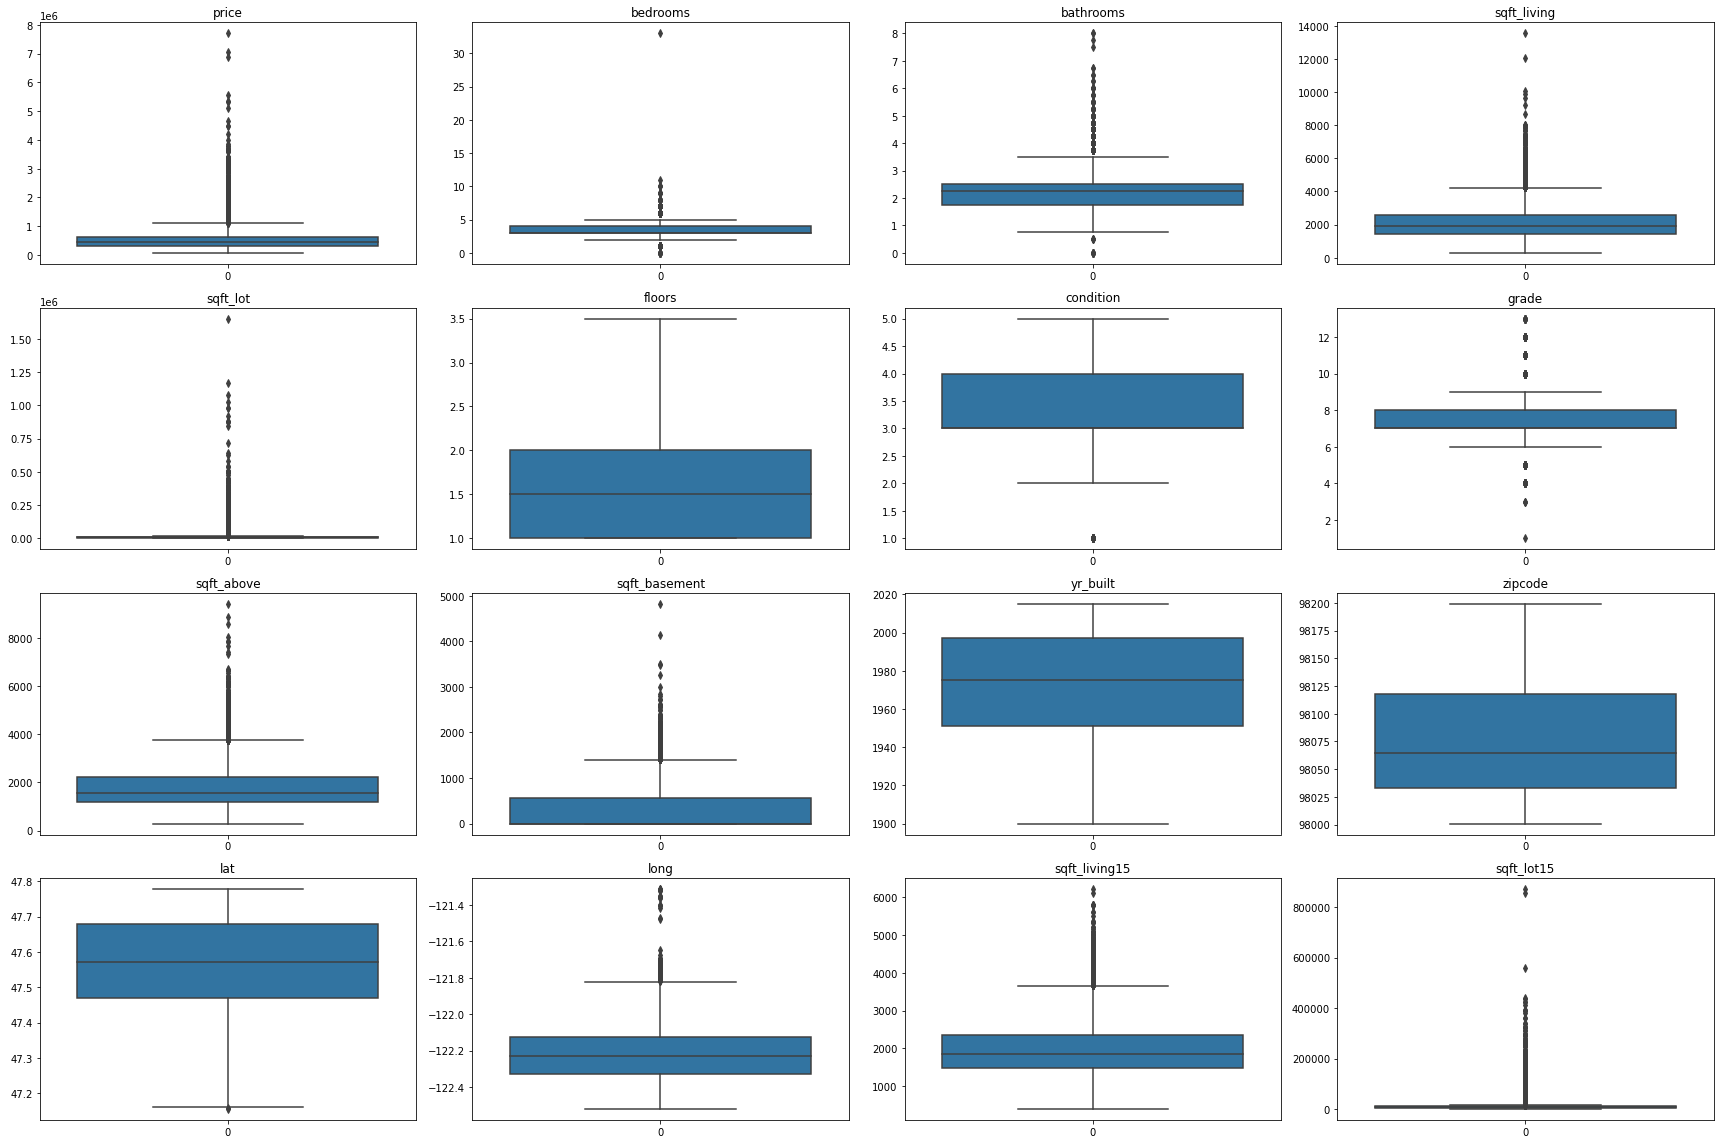

In [17]:
plt.figure(figsize=(24, 16))
for feature in df.drop('date',axis=1).columns.to_list():
    plt.subplot(4, 4, df.columns.to_list().index(feature))
    sns.boxplot(data=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [18]:
datetime_column = df['date']  # Save the datetime column separately


numeric_columns = df.drop(["grade","condition","floors","bathrooms","bedrooms"],axis=1).select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[numeric_columns]
# Apply RobustScaler to numeric data
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

# Combine scaled numeric data with the datetime column
scaled_df = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

In [19]:
numeric_data = scaled_df[numeric_columns]

# Apply RobustScaler to numeric data
transformer = PowerTransformer(method = "yeo-johnson")
transformed_numeric_data = transformer.fit_transform(numeric_data)

# Combine scaled numeric data with the datetime column
transformed_df = pd.DataFrame(transformed_numeric_data, columns=numeric_columns)
transformed_df['date'] = datetime_column 
transformed_df[['grade','condition','floors','bathrooms','bedrooms']] = df[['grade','condition','floors','bathrooms','bedrooms']]

In [20]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1 
    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5
    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]
    return ls

In [21]:
transformed_df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'date', 'grade', 'condition', 'floors', 'bathrooms', 'bedrooms'],
      dtype='object')

In [22]:
index_list = []
for featsure in numeric_columns:
    index_list.extend(outliers(transformed_df,featsure))

In [23]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [24]:
transformed_df = remove(transformed_df,index_list)

In [25]:
transformed_df.shape

(20698, 17)

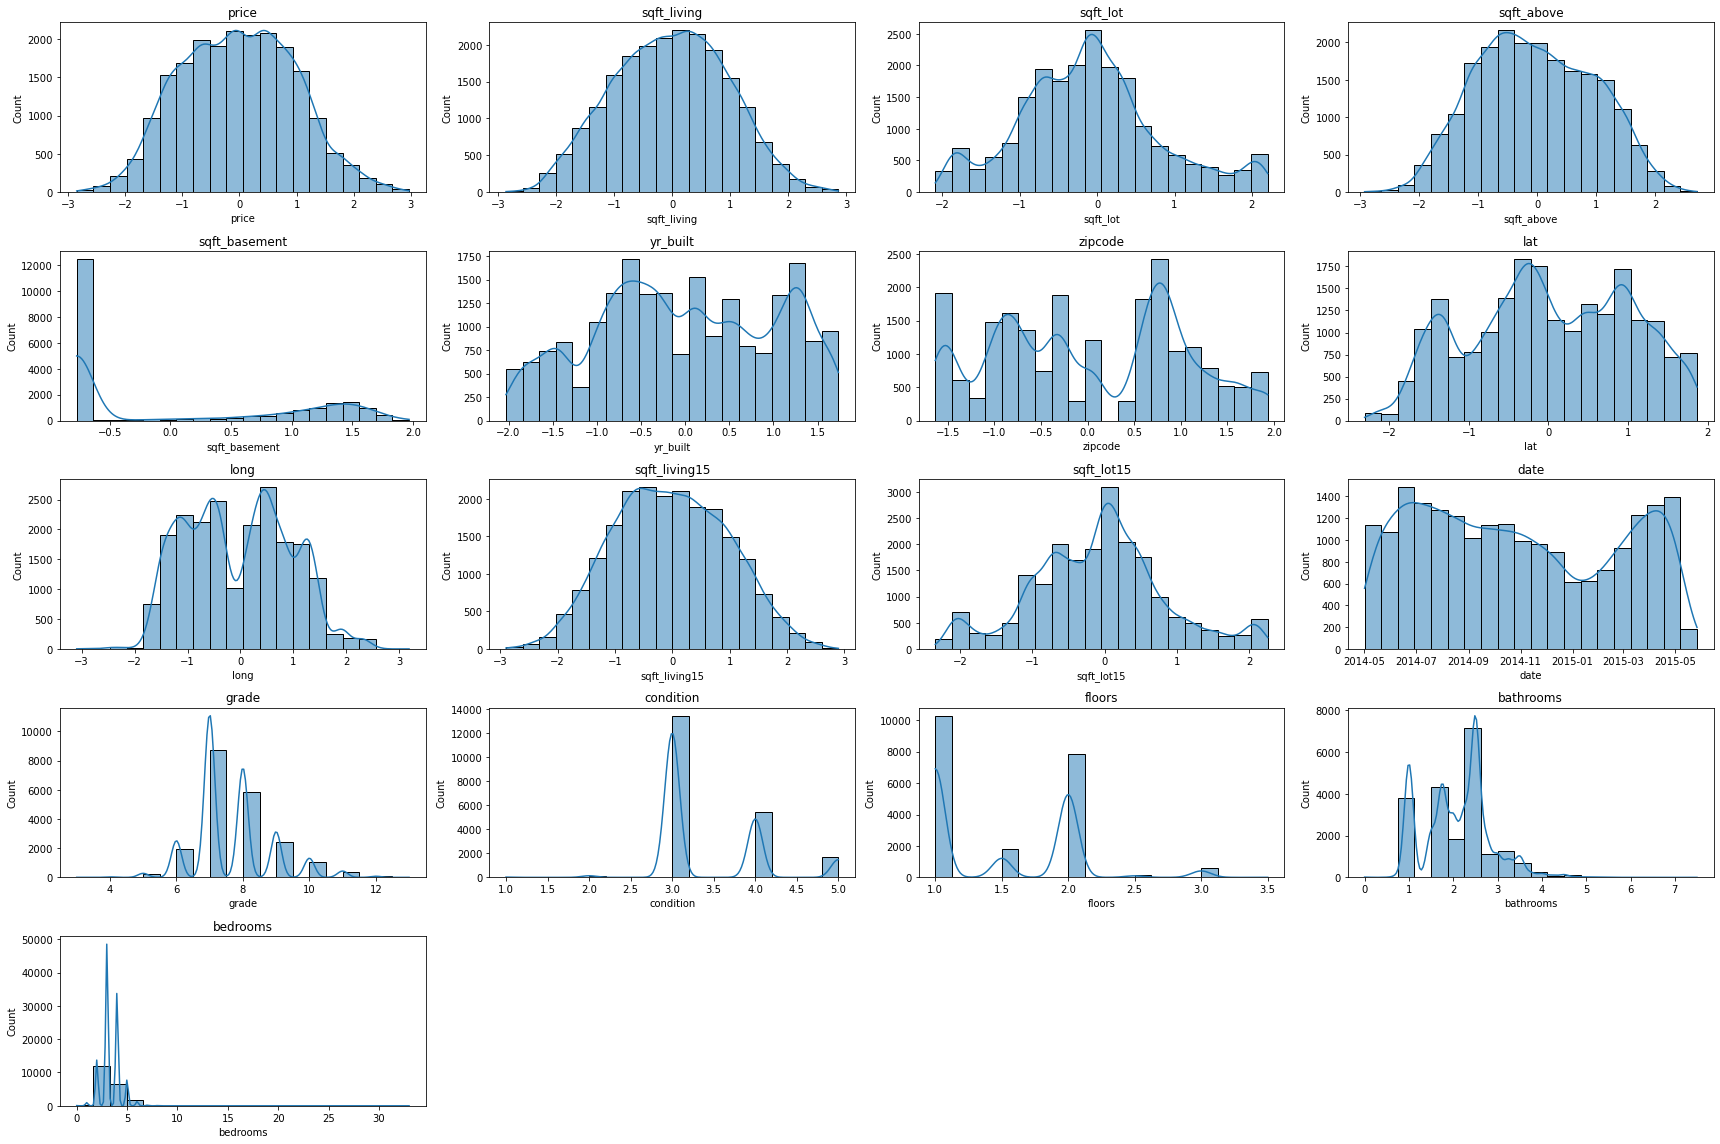

In [26]:
plt.figure(figsize=(24, 16))
for feature in transformed_df.columns.to_list():
    plt.subplot(5, 4, transformed_df.columns.to_list().index(feature) + 1)
    sns.histplot(data=transformed_df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

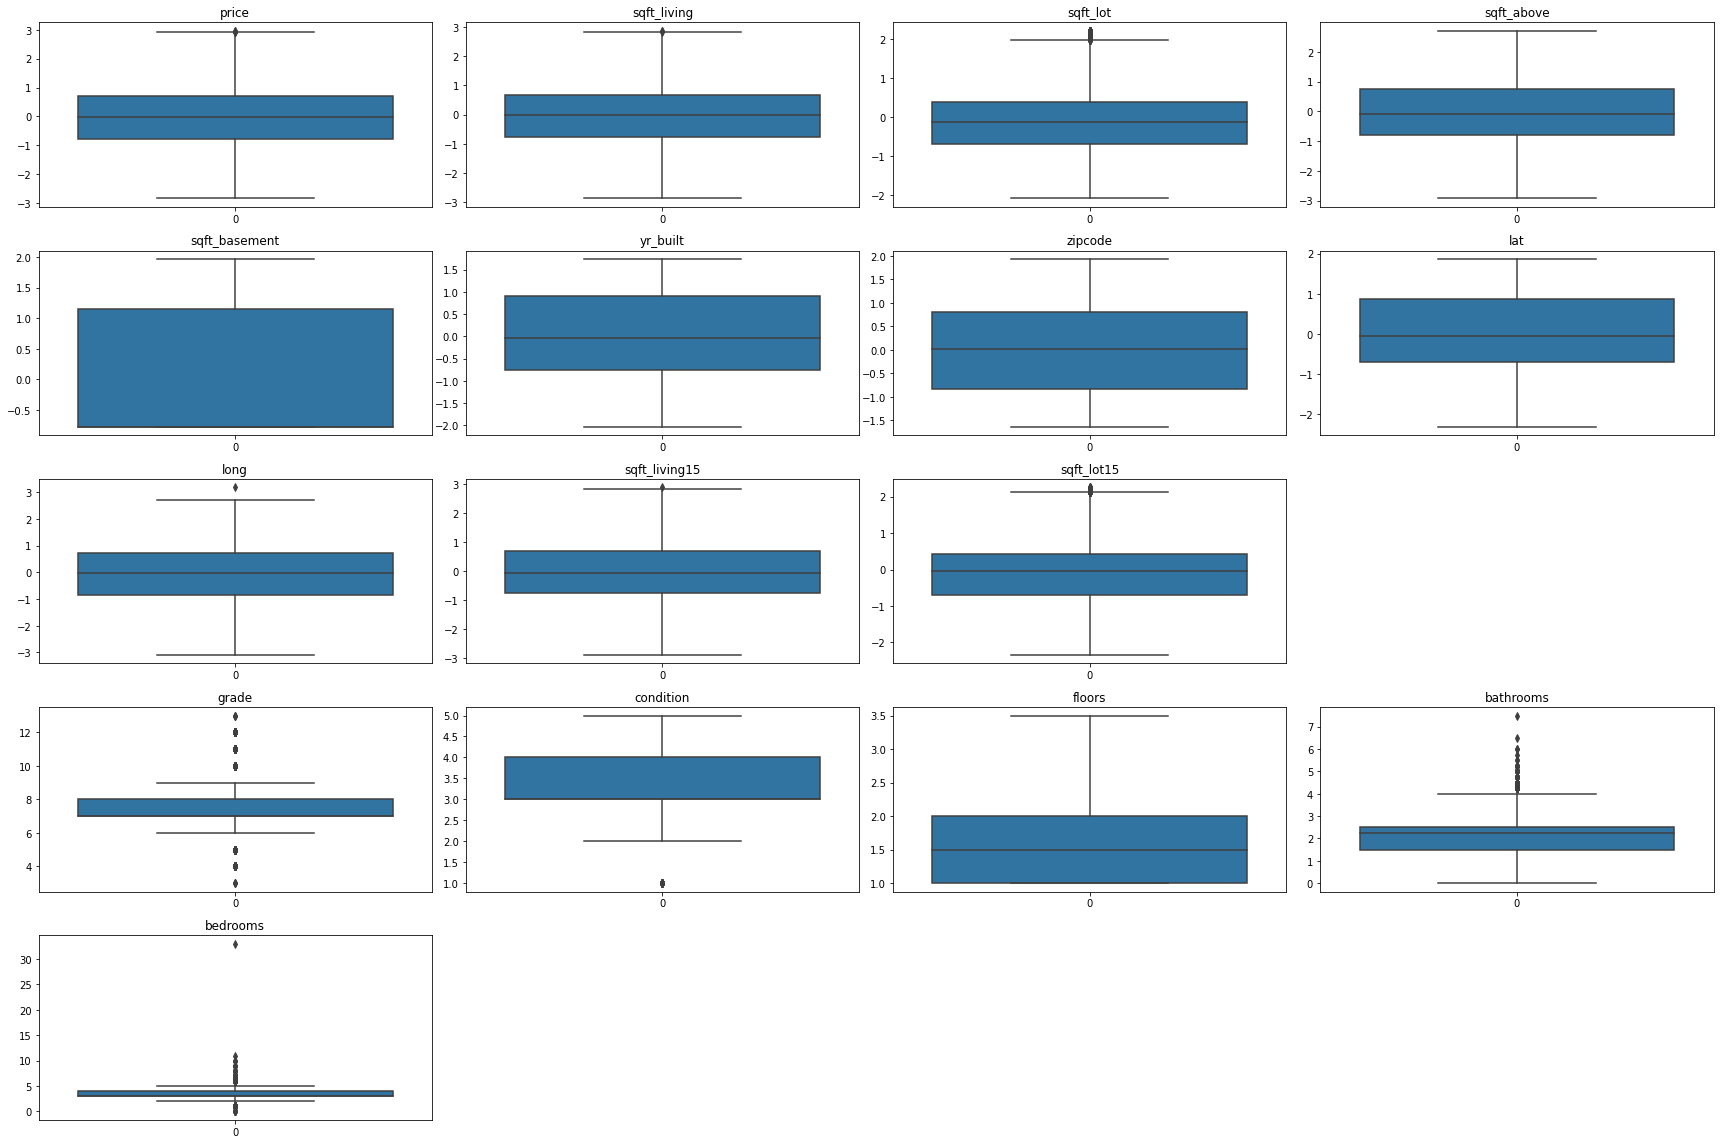

In [27]:
plt.figure(figsize=(24, 16))
for feature in transformed_df.drop('date',axis=1).columns.to_list():
    plt.subplot(5, 4, transformed_df.columns.to_list().index(feature)+1)
    sns.boxplot(data=transformed_df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

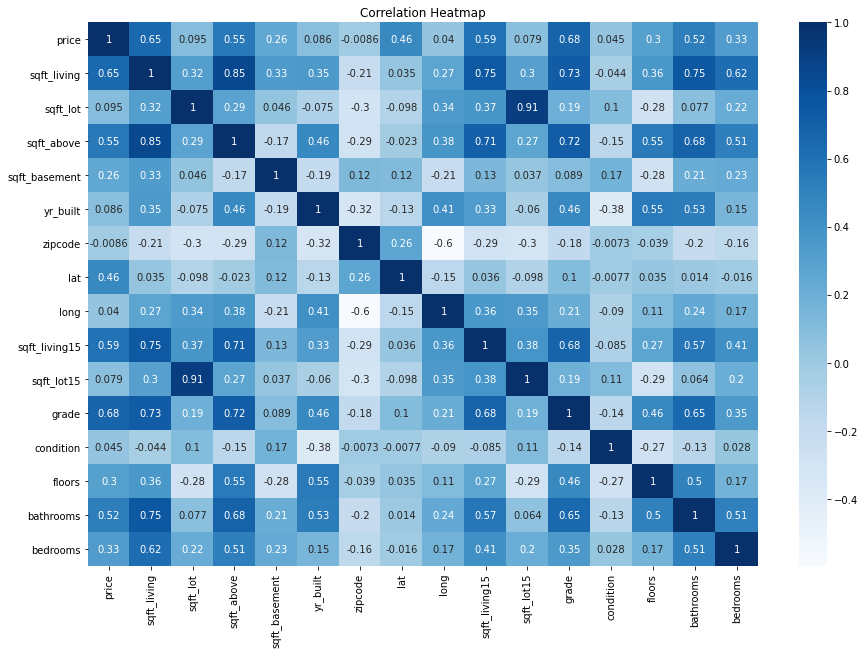

In [30]:
correlation_matrix = transformed_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
transformed_df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'date', 'grade', 'condition', 'floors', 'bathrooms', 'bedrooms'],
      dtype='object')

In [31]:
print(transformed_df['sqft_living'].corr(transformed_df['price']))
print(transformed_df['sqft_above'].corr(transformed_df['price']))

0.6547539060821369
0.5519342313668024


In [32]:
print(transformed_df['sqft_living15'].corr(transformed_df['price']))
print(transformed_df['sqft_living'].corr(transformed_df['price']))

0.5892074649206603
0.6547539060821369


In [33]:
print(transformed_df['sqft_lot'].corr(transformed_df['price']))
print(transformed_df['sqft_lot15'].corr(transformed_df['price']))

0.09521061906613217
0.07908042092959093


In [34]:
#'sqft_above','sqft_living15','grade','bathrooms'
transformed_df.drop(['sqft_above','sqft_living15','sqft_lot15','date'],axis=1,inplace=True)

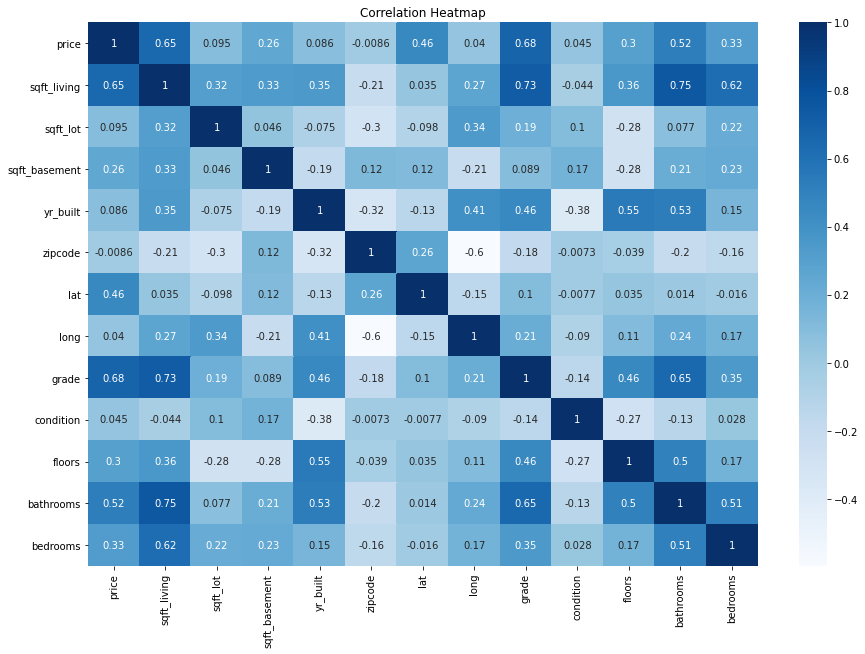

In [35]:
correlation_matrix = transformed_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
target = 'price'
X = transformed_df.drop(columns=[target])
y = transformed_df[target]

In [38]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.25 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (15523, 12)
y_train shape: (15523,)
X_test shape: (5175, 12)
y_test shape: (5175,)


In [39]:
Lrg = LinearRegression()
Lrg.fit(X_train , y_train)

LinearRegression()

In [40]:
y_pred = Lrg.predict(X_test)

In [41]:
r2_score(y_test , y_pred)

0.7313860503685896

In [42]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503
